https://www.baeldung.com/cs/cyclomatic-complexity
https://dl.acm.org/doi/pdf/10.1145/954373.954375
https://www.geeksforgeeks.org/cyclomatic-complexity/
https://www.guru99.com/cyclomatic-complexity.html
https://artesoftware.com.br/2019/02/09/complexidade-ciclomatica/
https://pt.stackoverflow.com/questions/193665/o-que-%C3%A9-complexidade-ciclom%C3%A1tica
https://www.treinaweb.com.br/blog/complexidade-ciclomatica-analise-estatica-e-refatoracao/


# Análise do Algoritmos


Perguntas a Serem Repondidas
- Carregamento

- Como Os dados estão organizados, o que cada coluna significa?

Nos dataset forãm organizados os dados com as seguintes colunas:
- Tempo de Exeucução
- Método
- Epoca
- Tamanho do Vetor

- Quais forão os melhores resultados

- O que podemos concluir com os dados dos exemplos baseado na complexidade ciclomatica junto com outros testes?



# Configuração do ambiente

## Instalação dos Pacotes
Foram instalados os pacotes numpy para trabalhar com os vetores, pandas, tensorflow

In [ ]:
!cat /proc/devices

Character devices:
  1 mem
  4 /dev/vc/0
  4 tty
  4 ttyS
  5 /dev/tty
  5 /dev/console
  5 /dev/ptmx
  7 vcs
 10 misc
 13 input
128 ptm
136 pts
202 cpu/msr
203 cpu/cpuid
246 nvme-generic
247 nvme
248 bsg
249 watchdog
250 ptp
251 pps
252 rtc
253 dax
254 tpm

Block devices:
  7 loop
  8 sd
  9 md
 11 sr
 65 sd
 66 sd
 67 sd
 68 sd
 69 sd
 70 sd
 71 sd
128 sd
129 sd
130 sd
131 sd
132 sd
133 sd
134 sd
135 sd
253 device-mapper
254 mdp
259 blkext


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [8]:
%pip install tqdm
%pip install numba
%pip install seaborn
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 6.1 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 178.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importação dos Pacotes

In [1]:
import sys
import math
import timeit
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from typing import Any
import tensorflow as tf
import multiprocessing as mp
from numba import cuda, types
from collections.abc import Callable
from collections.abc import Iterable

2024-03-23 19:20:41.070760: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 19:20:42.337106: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 19:20:45.883094: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 19:20:55.038903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Algoritmos a serem testados
Para realizar a comparação de algoritmos de busca, foram realizado suas formas tradicionais (busca sequencial, otimizada e binaria) e outras técnicas de melhorias como multiprocessamento, TPU e GPU.

## Tradicional
Busca Sequencial

In [12]:
def busca_sequencial(vetor:np.ndarray, chave:int, inicio:int, final:int)-> int:
  for index in range(inicio, final):
    if vetor[index] == chave:
      return index
  return -1

Busca Sequencial Otimizada

In [31]:
def busca_sequencial_otimizada(vetor:np.ndarray, chave:int, inicio:int, final:int)-> int:
  for index in range(inicio, final):
    if vetor[index] > chave:
      return -1
    elif vetor[index] == chave:
      return index

Busca Binaria

In [14]:
def busca_binaria(vetor:np.ndarray, chave:int, esquerda:int, direita:int) -> int:
  inicio:int = 0
  fim:int = len(vetor) - 1
  while inicio <= fim:
    meio:int = (inicio + fim) // 2
    if vetor[meio] == chave:
      return meio
    elif vetor[meio] < chave:
      inicio:int = meio + 1
    else:
      fim:int = meio - 1
  return 0

## GPU
Para a utilização da GPU foi elaboração uma função que configura se o ambiente

In [ ]:
@cuda.jit
def sequential_search_kernel(vetor, chave, result):
    tx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    if tx < vetor.shape[0]:
        if vetor[tx] == chave:
            result[0] = tx
            return
        if tx == vetor.shape[0] - 1:
            result[0] = -1

def sequential_search(vetor:np.ndarray, chave:int):
    array_size = vetor.shape[0]
    result = np.array([-1], dtype=np.int32)
    d_array = cuda.to_device(vetor)
    d_result = cuda.to_device(result)
    threads_per_block = 256
    blocks_per_grid = (array_size + (threads_per_block - 1)) // threads_per_block
    sequential_search_kernel[blocks_per_grid, threads_per_block](d_array, chave, d_result)
    cuda.synchronize()
    d_result.copy_to_host(result)
    return result[0]

In [ ]:
@cuda.jit
def optimized_search_kernel(vetor, chave, result):
    tx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    if tx < vetor.shape[0]:
        if vetor[tx] <= chave or vetor[tx] == chave:
            result[0] = tx
            return
        if tx == vetor.shape[0] - 1:
            result[0] = -1
    result[0] = -1

def optimized_search(vetor:np.ndarray, chave:int):
    d_arr = cuda.to_device(vetor)
    result = np.array([-1], dtype=np.int32)
    d_result = cuda.to_device(result)
    threadsperblock = 256
    blockspergrid = (vetor.shape[0] + (threadsperblock - 1)) // threadsperblock
    optimized_search_kernel[blockspergrid, threadsperblock](d_arr, chave, d_result)
    cuda.synchronize()
    d_result.copy_to_host(result)
    return result[0]

In [ ]:
@cuda.jit
def binary_search_kernel(vetor, chave, result):
    inicio = 0
    final = vetor.shape[0] - 1
    while inicio <= final:
        meio = (inicio + final) // 2
        if vetor[meio] == chave:
            result[0] = meio
            return
        elif vetor[meio] < chave:
            inicio = meio + 1
        else:
            final = meio - 1
    result[0] = -1

def binary_search(vetor, chave):
    d_arr = cuda.to_device(vetor)
    result = np.array([-1], dtype=np.int32)
    d_result = cuda.to_device(result)
    threadsperblock = 256
    blockspergrid = (vetor.shape[0] + (threadsperblock - 1)) // threadsperblock
    binary_search_kernel[blockspergrid, threadsperblock](d_arr, chave, d_result)
    cuda.synchronize()
    d_result.copy_to_host(result)

    return result[0]

In [ ]:
def gpu_execute():
  # Configuração de GPU (se disponível)
  gpus = tf.config.experimental.list_physical_devices('GPU')
  if gpus:
      try:
          for gpu in gpus:
              tf.config.experimental.set_memory_growth(gpu, True)
          strategy = tf.distribute.MultiWorkerMirroredStrategy()
          return strategy
      except RuntimeError as e:
          print(e)

In [ ]:
def execute_strategy(strategy, target:np.ndarray, data:int, tipo_busca:str):
  index:int = -1
  with strategy.scope():
      if tipo_busca == 'b':
        index = binary_search(target, data)
      elif tipo_busca == 'o':
        index = optimized_search(target, data)
      elif tipo_busca == 's':
        index = sequential_search(target, data)
      elif tipo_busca == 'b_':
        index = busca_binaria(target, data, 0, target.shape[0])
      elif tipo_busca == 'o_':
        index = busca_sequencial_otimizada(target, data, 0, target.shape[0])
      elif tipo_busca == 's_':
        index = busca_sequencial(target, data, 0, target.shape[0])
      return index

## Mulprocessamento
Para o multiprocessamento foi utilizado o pacote multiprocessing do python, a qual

In [33]:
def busca_multiprocessado(target:Callable, vetor:np.ndarray, chave:int):
  num_processos = mp.cpu_count()
  tamanho_bloco = len(vetor) // num_processos
  processos = []
  for i in range(num_processos):
    inicio = i * tamanho_bloco
    fim = (i + 1) * tamanho_bloco - 1
    processo = mp.Process(target=target, args=(vetor, chave, inicio, fim))
    processos.append(processo)
    processo.start()

  for processo in processos:
    processo.join()

  for processo in processos:
    resultado = processo.exitcode
    if resultado != -1:
      return resultado

  return -1

# Coleta do Tempo Execução

Para esta coleta será criado uma função que a cada loop foi gerado 10000 vetores randomicos do tipo inteiro com os respectivos tamanhos $10^{4}$, $10^{5}$, $10^{6}$, $10^{7}$, em caso das busca otimizada e binaria os vetores foram gerados de forma ordernada.
Para mensurar o tempo executado será utilizado a ferramenta timeit.


### Tradicional

In [41]:
# Benchmark Busca Sequencial
def benchmark_bs():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.random.permutation(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: busca_sequencial(vetor, chave, 0, len(vetor)), number=1)],
          "método": ["busca sequencial"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

In [43]:
# Benchmark Busca Sequencial Otimizada
def benchmark_bso(data_benchmark_epoch:pd.DataFrame):
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.arange(tamanho,dtype=np.int64)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(
              lambda: busca_sequencial_otimizada(
                vetor, chave, 0, len(vetor)
              ),
              number=1
            )
          ],
          "método": ["busca sequencial otimizada"]
      })
      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)
  return data_benchmark_epoch

In [44]:
# Benchmark Busca Binaria
def benchmark_bb(data_benchmark_epoch:pd.DataFrame):
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.arange(tamanho,dtype=np.int64)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(
              lambda: busca_binaria(
                  vetor, chave, 0, len(vetor)
                ),
              number=1
            )
          ],
          "método": ["busca binaria"]
      })
      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)
  return data_benchmark_epoch

### Multiprocesso

In [45]:
# Benchmark Busca Sequencial Multiprocesso
def benchmark_bs_m():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.random.permutation(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: busca_multiprocessado(busca_sequencial,vetor, chave), number=1)],
          "método": ["busca sequencial multiprocesso"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

In [46]:
# Benchmark Busca Sequencial Otimizada Multiprocessado
def benchmark_bso_m():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.arange(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: busca_multiprocessado(busca_sequencial_otimizada, vetor, chave), number=1)],
          "método": ["busca sequencial otimizada multiprocesso"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

In [47]:
# Benchmark Busca Binaria Multiprocessado
def benchmark_bb_m():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.arange(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: busca_multiprocessado(busca_binaria, vetor, chave), number=1)],
          "método": ["busca binaria multiprocesso"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

### GPU

In [ ]:
# Benchmark Busca Binaria com GPU
def benchmark_bb_gpu():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.arange(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: execute_strategy(gpu_execute(), vetor, chave,'b'), number=1)],
          "método": ["busca binaria com gpu"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

In [ ]:
# Benchmark Busca Sequencial com GPU
def benchmark_bs_gpu():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.random.permutation(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: execute_strategy(gpu_execute(), vetor, chave,'s'), number=1)],
          "método": ["busca sequencial com gpu"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

In [ ]:
# Benchmark Busca Sequencial Otimizada com GPU
def benchmark_bso_gpu():
  data_benchmark_epoch: pd.DataFrame = pd.DataFrame({})
  tamanho_dos_vetores: list[int]  = [10**4,10**5,10**6,10**7]
  for tamanho in tamanho_dos_vetores:
    for i in tqdm(range(10_000)):
      vetor:np.ndarray = np.arange(tamanho)
      chave:int =  vetor[random.randint(0, tamanho - 1)]
      item = pd.DataFrame({
          "epoca": [i],
          "tamanho do vetor": [tamanho],
          "tempo de execução": [timeit.timeit(lambda: execute_strategy(gpu_execute(), vetor, chave,'o'), number=1)],
          "método": ["busca sequencial otimizada com gpu"]
      })

      data_benchmark_epoch = pd.concat([data_benchmark_epoch, item], ignore_index=True)

  return data_benchmark_epoch

## Execução dos códigos

Neste parte será salvo os dados em um dataframe para serem analisados, sendo analisado o tipo de algoritmo usado, a ténica e o tempo de execução

#### Algoritmos sem otimização de hardware

In [ ]:
benchmark_bs().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bs.csv')

In [48]:
benchmark_bso(pd.DataFrame({})).to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bso.csv')

 46%|████▌     | 4597/10000 [2:06:05<2:28:11,  1.65s/it]


In [ ]:
benchmark_bb(pd.DataFrame({})).to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bb.csv')

#### Algoritmos otimizado com Paralelismo

In [ ]:
benchmark_bs_m().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bs_m.csv')

  4%|▍         | 432/10000 [14:03<4:57:20,  1.86s/it]

In [ ]:
benchmark_bso_m().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bso_m.csv')

In [ ]:
benchmark_bb_m().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bb_m.csv')

#### Algoritmos com otimização de hardware GPU

In [ ]:
benchmark_bs_gpu().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bs_gpu.csv')

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 40 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
100%|██████████| 10000/10000 [1:10:27<00:00,  2.37it/s]


In [ ]:
benchmark_bso_gpu().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bso_gpu.csv')

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 40 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
100%|██████████| 10000/10000 [07:43<00:00, 21.58it/s]


In [ ]:
benchmark_bb_gpu().to_csv('../data/dados_benchmark_dos_algoritmos_de_buscas_bb_gpu.csv')

# (Analise Exploratoria dos Dados)

In [2]:
import os
import pandas as pd

benchmark_files = [f for f in os.listdir('../data/') if f.endswith('.csv')]
benchmark_data:pd.DataFrame = pd.DataFrame({})
for f in benchmark_files:
  if 'data_' not in f:
    benchmark_data = pd.concat([benchmark_data,pd.read_csv("../data/"+f)], ignore_index=True)

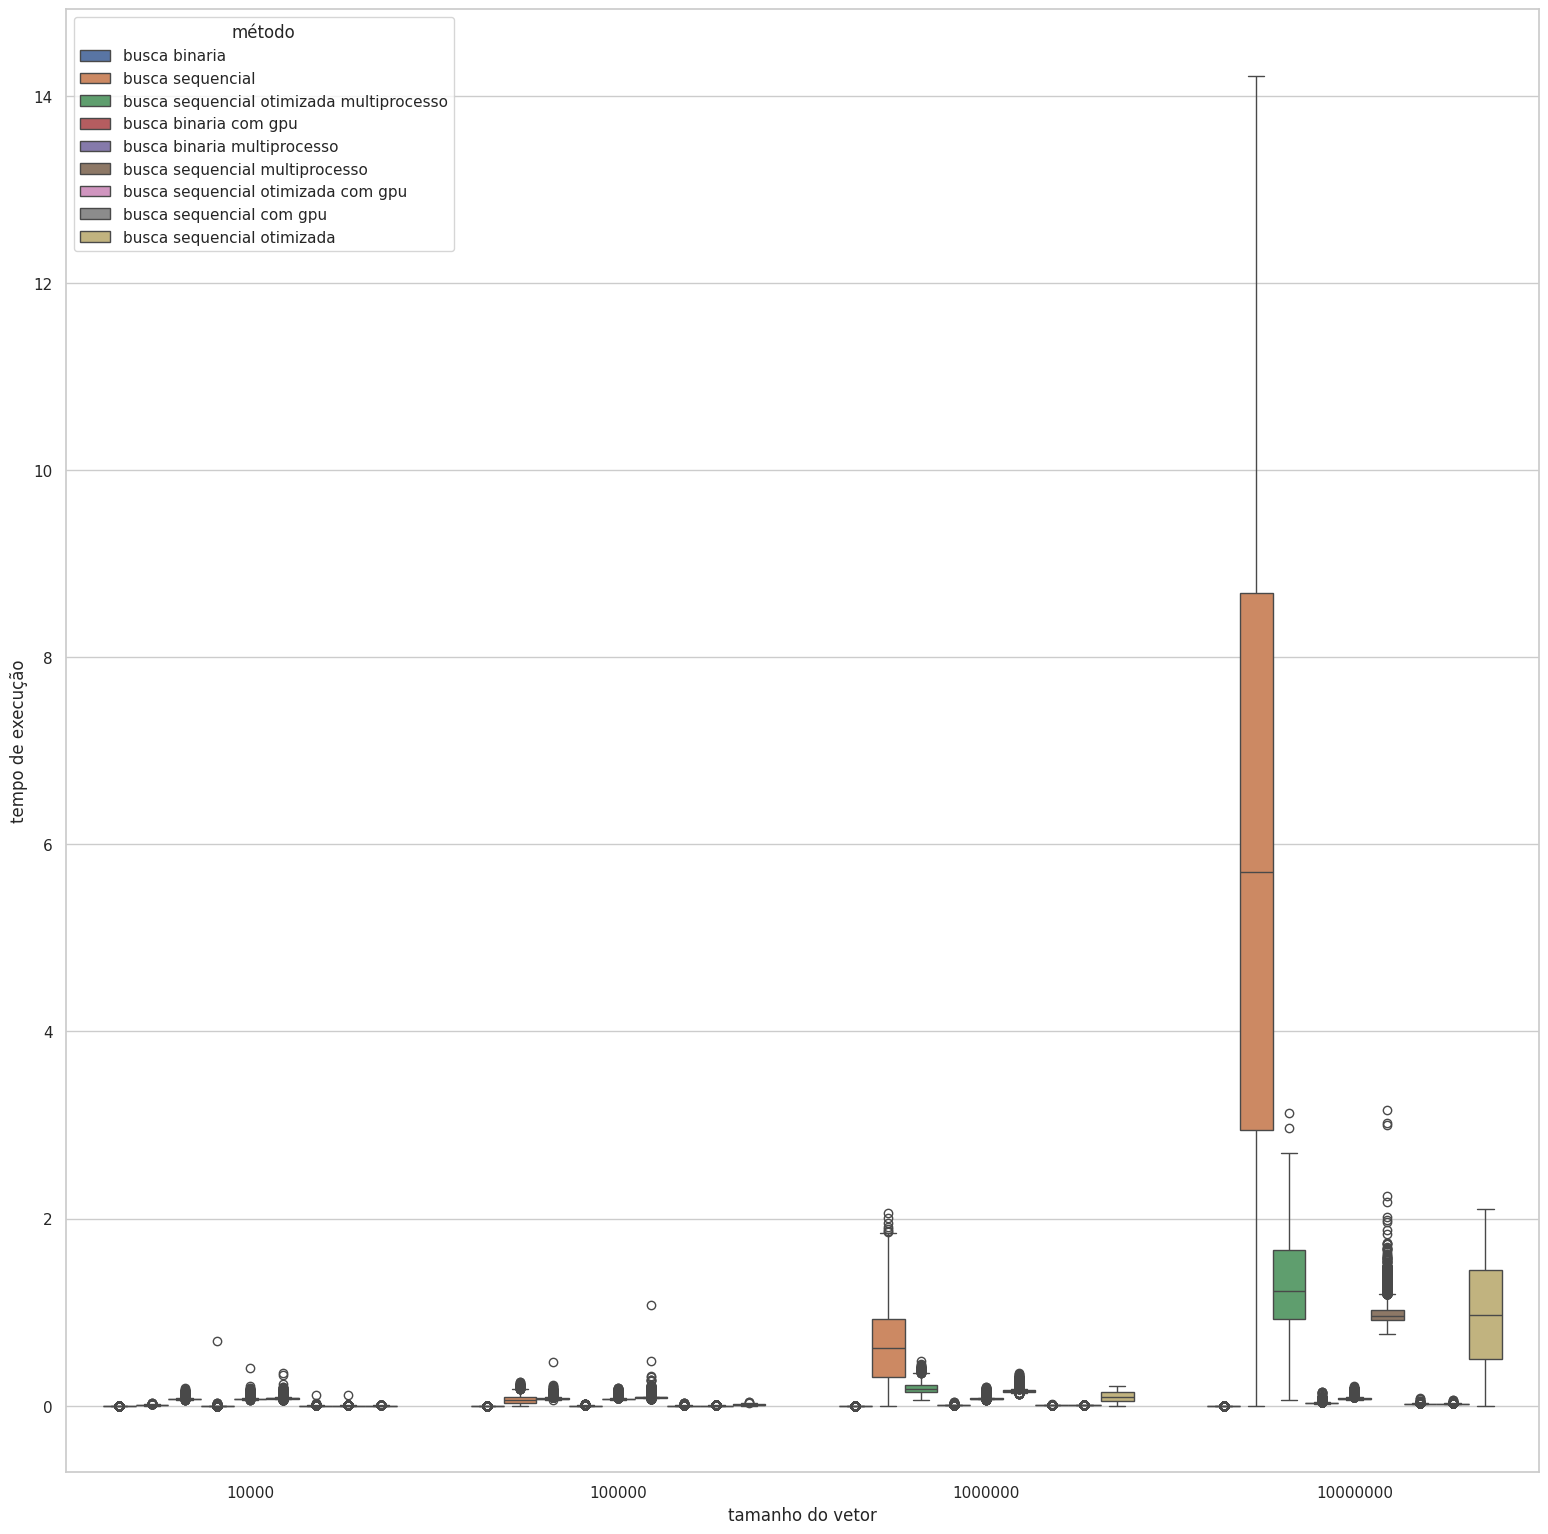

In [14]:
# plot dos dados
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 19))
sns.boxplot(x="tamanho do vetor", y="tempo de execução", hue="método", data=benchmark_data)
plt.show()


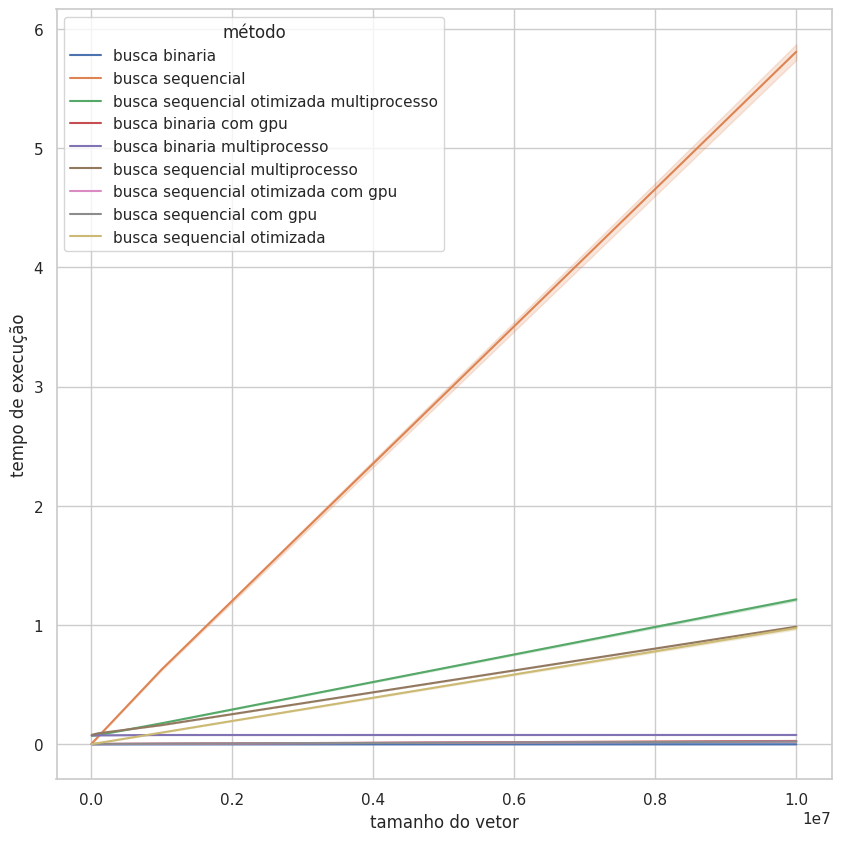

In [15]:
# plot data linear
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.lineplot(x="tamanho do vetor", y="tempo de execução", hue="método", data=benchmark_data)
plt.show()


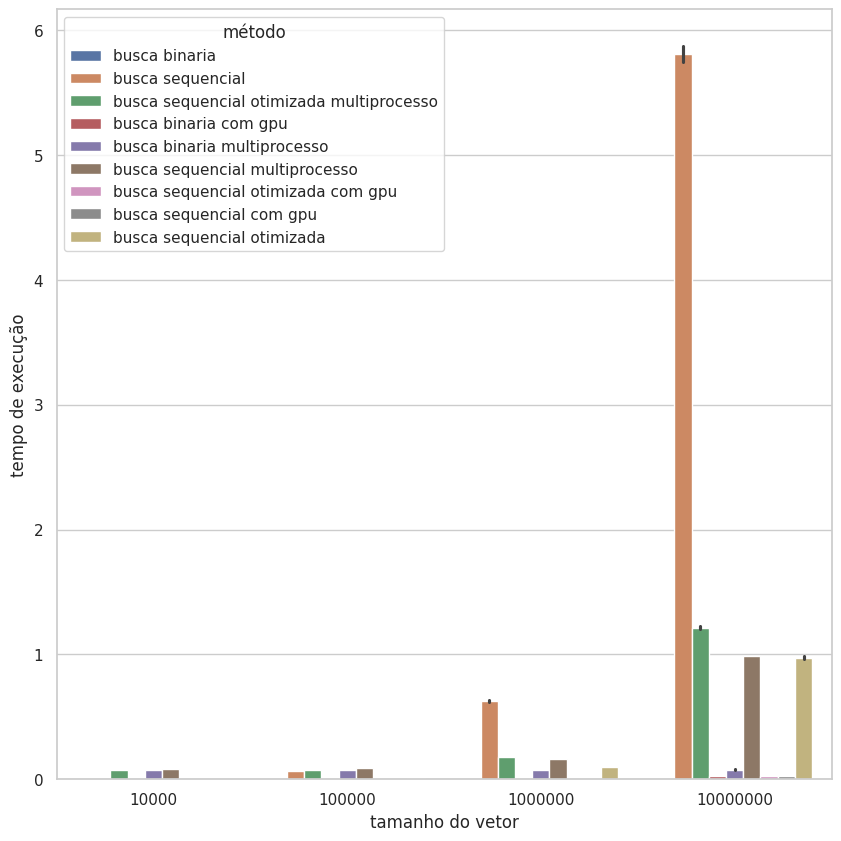

In [16]:
#plot data bar
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(x="tamanho do vetor", y="tempo de execução", hue="método", data=benchmark_data)
plt.show()

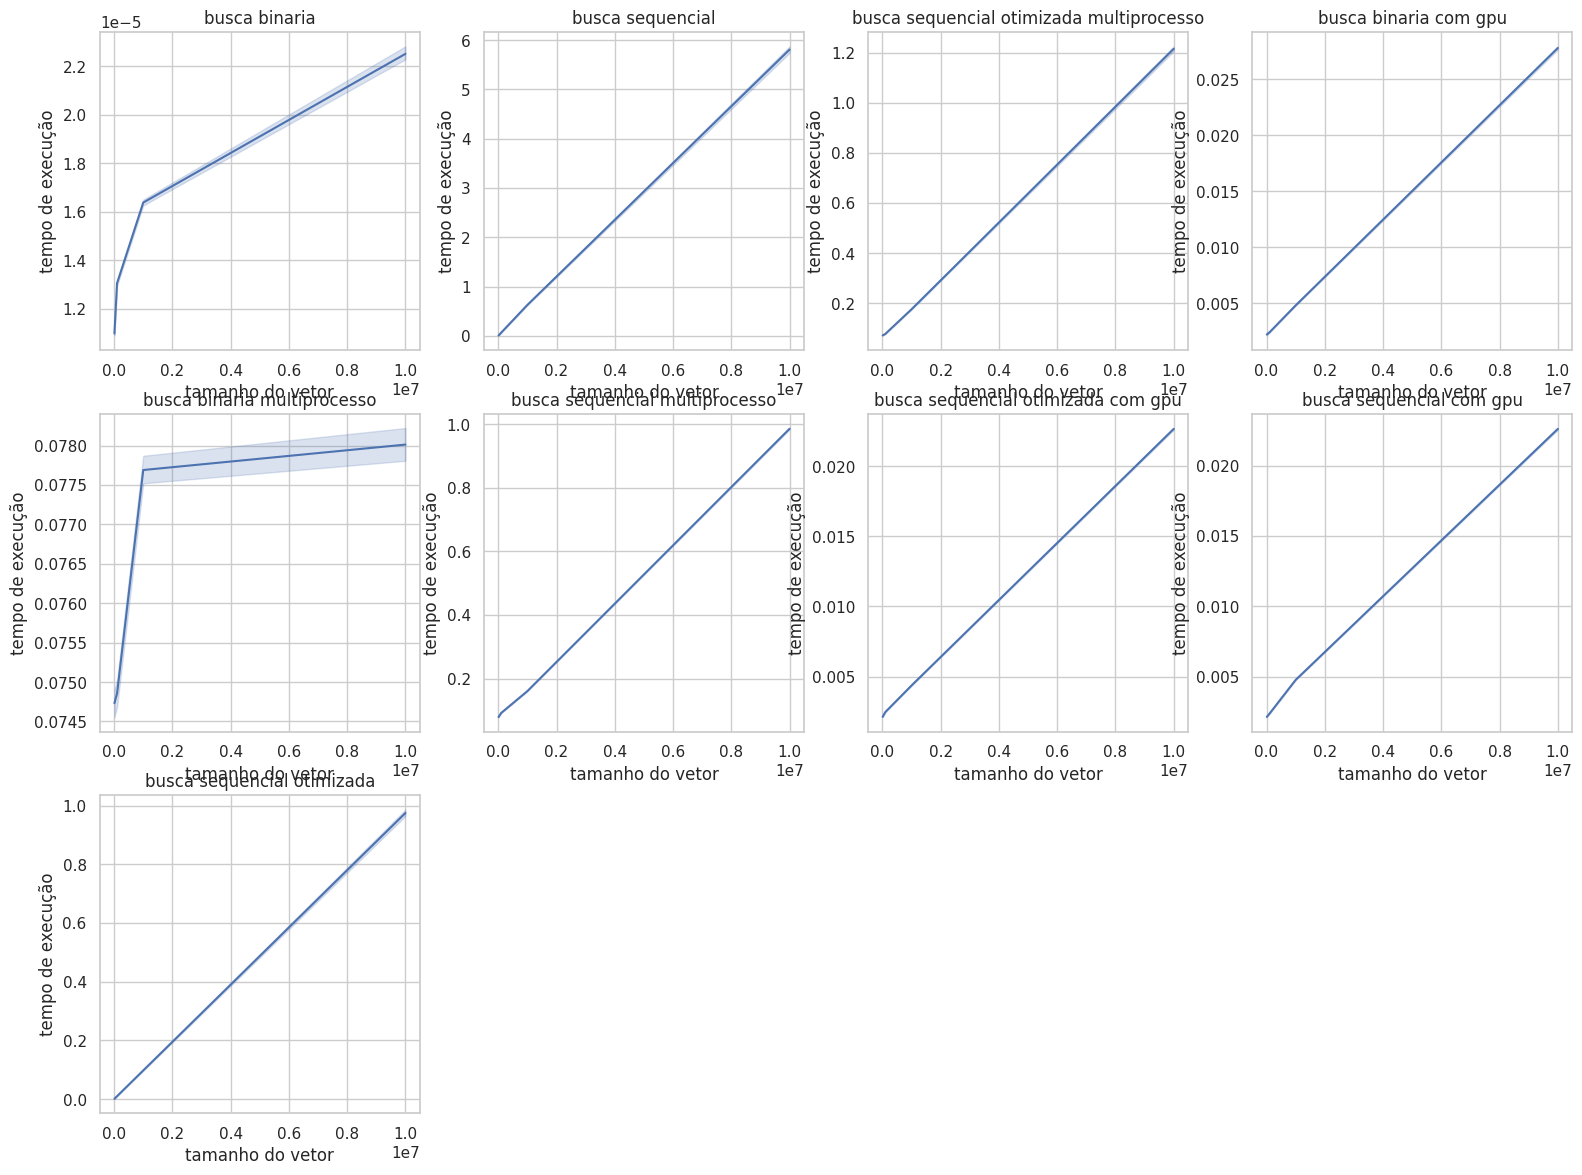

In [17]:
# plot multiplos graficos de acordo com os métodos, 4 graficos por linha
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 19))
i:int = 1
for metodo in benchmark_data['método'].unique():
  plt.subplot(4, 4, i)
  sns.lineplot(x="tamanho do vetor", y="tempo de execução", data=benchmark_data[benchmark_data['método'] == metodo])
  plt.title(metodo)
  i+=1
plt.show()

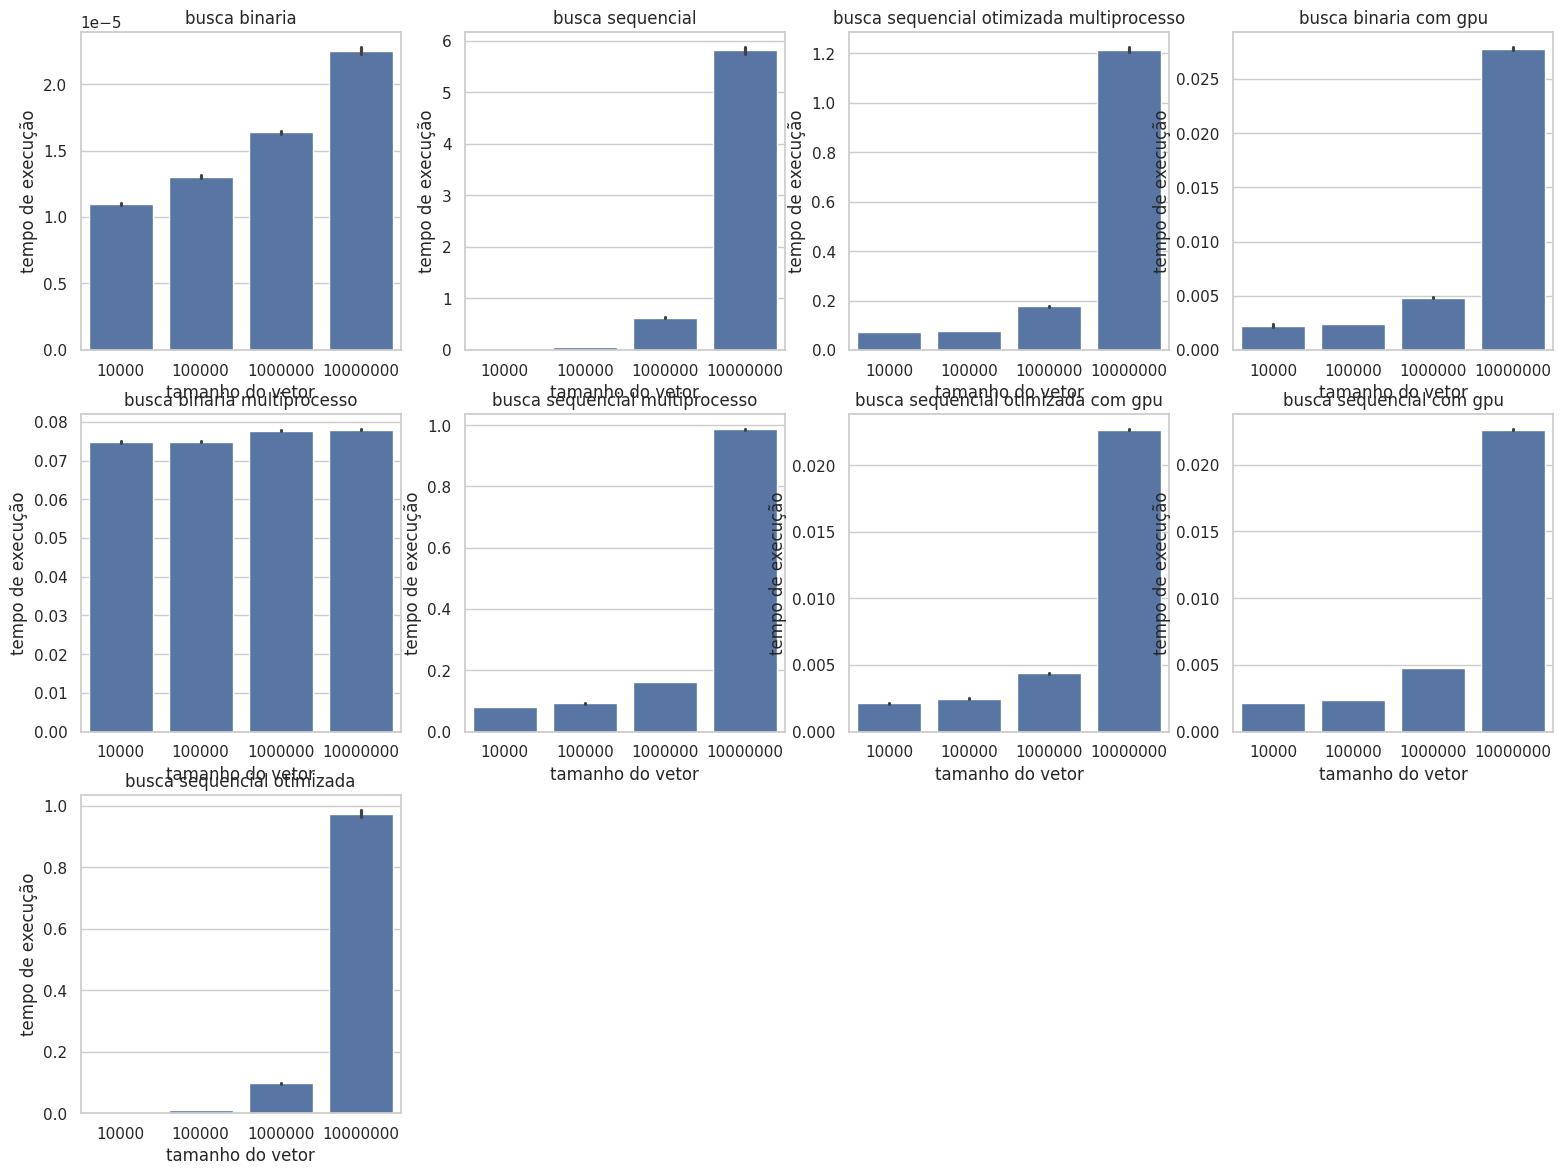

In [19]:
# plot multiplos graficos de acordo com os métodos, 4 graficos por linha
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 19))
i:int = 1
for metodo in benchmark_data['método'].unique():
  plt.subplot(4, 4, i)
  sns.barplot(x="tamanho do vetor", y="tempo de execução", data=benchmark_data[benchmark_data['método'] == metodo])
  plt.title(metodo)
  i+=1
plt.show()

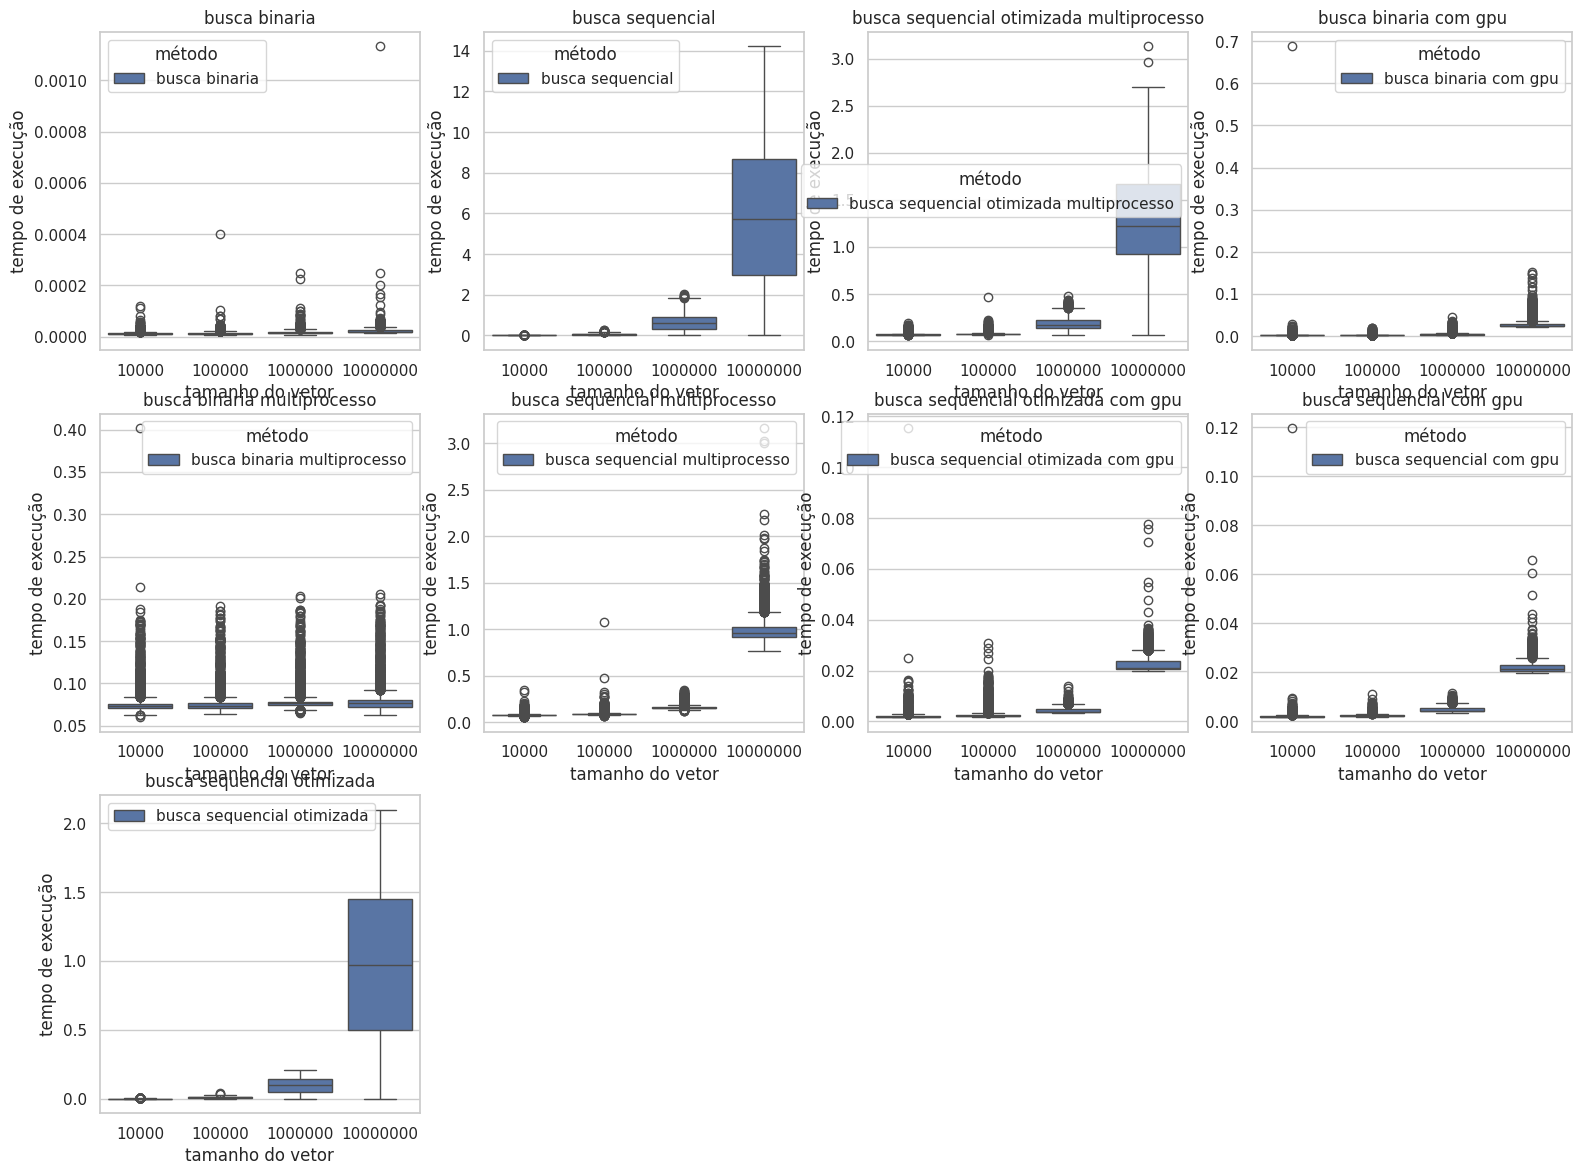

In [46]:
# plot multiplos graficos de acordo com os métodos, 4 graficos por linha
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(19, 19))
i:int = 1
for metodo in benchmark_data['método'].unique():
  plt.subplot(4, 4, i)
  sns.boxplot(x="tamanho do vetor", y="tempo de execução", data=benchmark_data[benchmark_data['método'] == metodo], hue='método')
  plt.title(metodo)
  i+=1
plt.show()

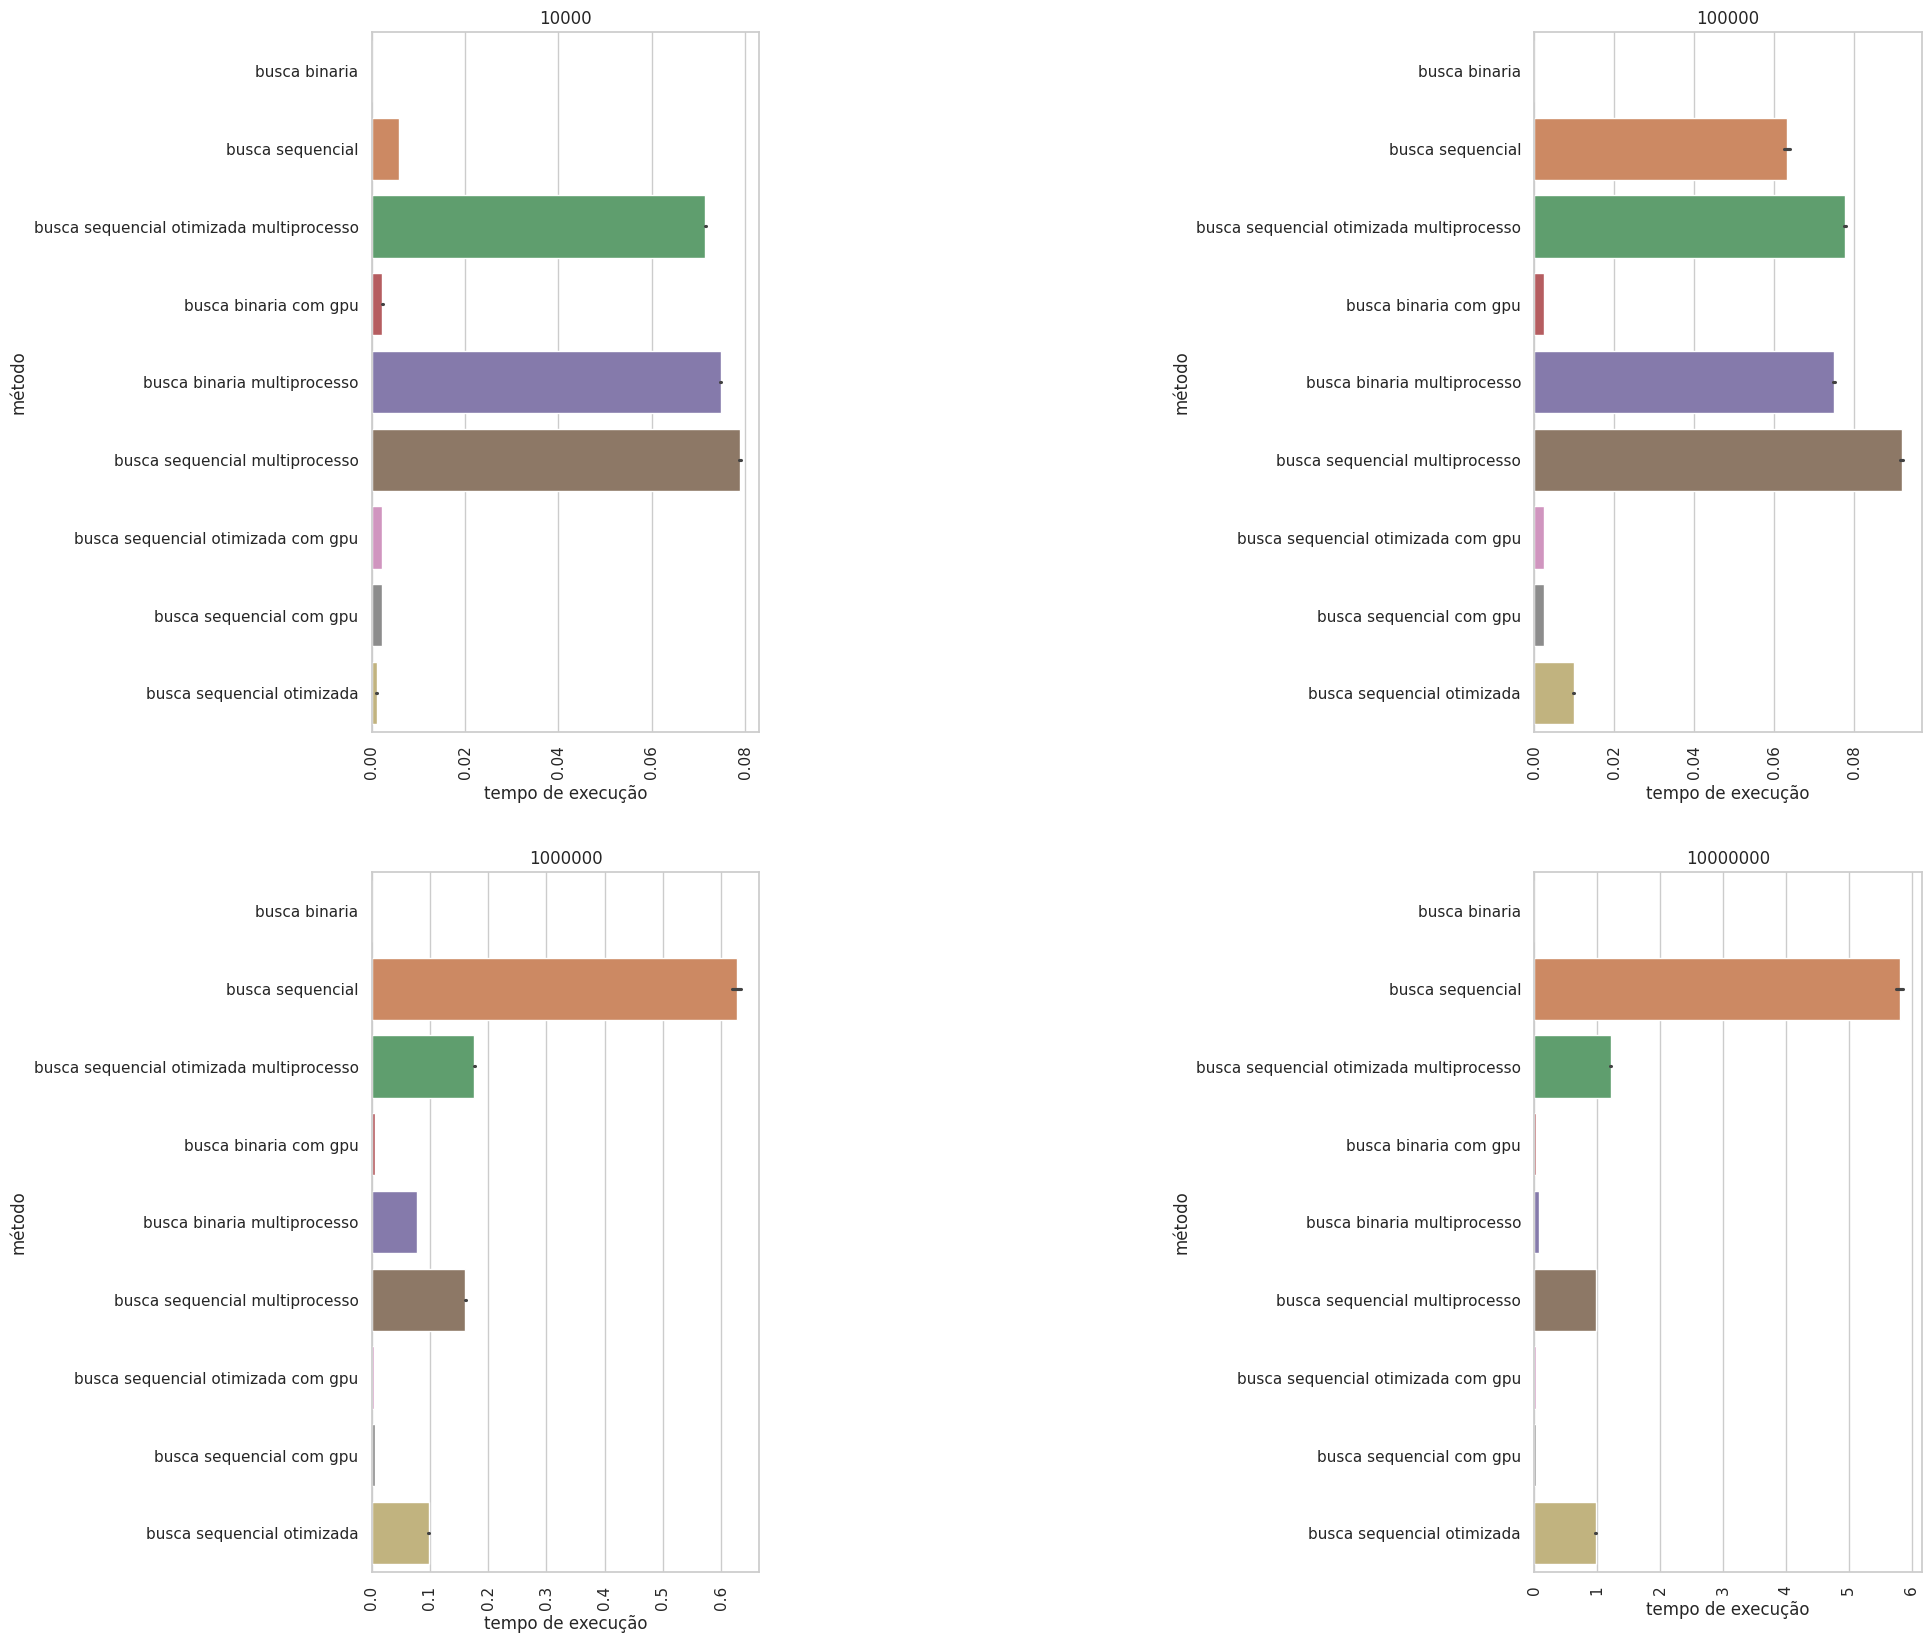

In [11]:
# plot graficos de acordo com os métodos e tamanho em função barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 20))
i:int = 1
for metodo in benchmark_data['tamanho do vetor'].unique():
  plt.subplot(2, 2, i)
  sns.barplot(x="tempo de execução", y="método", data=benchmark_data[benchmark_data['tamanho do vetor'] == metodo], hue='método')
  plt.title(metodo)
  plt.xticks(rotation=90)
  i+=1

plt.subplots_adjust(wspace=2)
plt.show()

In [ ]:
benchmark_data[(benchmark_data['tamanho do vetor'] == 10000) & (benchmark_data['método'] == 'busca sequencial')].plot(kind='bar', x='epoca', y='tempo de execução')

In [4]:
# plot grafico de acordo com os x tempo de execução e métodos em função barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 20))
i:int = 1
for metodo in benchmark_data['método'].unique():
  for tamanho in benchmark_data['tamanho do vetor'].unique():
    plt.subplot(4, 4, i)
    sns.barplot(x="epoca", y="tempo de execução", data=benchmark_data[(benchmark_data['tamanho do vetor'] == tamanho) & (benchmark_data['método'] == metodo)], hue='método')
    plt.title(metodo)
    plt.xticks(rotation=90)
    i+=1

plt.subplots_adjust(wspace=2)
plt.show()

In [34]:
#groupby data by method

benchmark_data.groupby('método').mean()['tempo de execução']

método
busca binaria                               0.000016
busca binaria com gpu                       0.009309
busca binaria multiprocesso                 0.076322
busca sequencial                            1.626075
busca sequencial com gpu                    0.007967
busca sequencial multiprocesso              0.329388
busca sequencial otimizada                  0.270837
busca sequencial otimizada com gpu          0.007908
busca sequencial otimizada multiprocesso    0.384986
Name: tempo de execução, dtype: float64

In [6]:
(0.076322/0.000016)*100

477012.5

In [7]:
benchmark_data.groupby('método').min()['tempo de execução']

método
busca binaria                               0.000005
busca binaria com gpu                       0.001657
busca binaria multiprocesso                 0.060153
busca sequencial                            0.000007
busca sequencial com gpu                    0.001693
busca sequencial multiprocesso              0.056834
busca sequencial otimizada                  0.000003
busca sequencial otimizada com gpu          0.001659
busca sequencial otimizada multiprocesso    0.059786
Name: tempo de execução, dtype: float64

In [8]:
benchmark_data.groupby('método').max()['tempo de execução']

método
busca binaria                                0.001133
busca binaria com gpu                        0.687601
busca binaria multiprocesso                  0.401898
busca sequencial                            14.214296
busca sequencial com gpu                     0.119709
busca sequencial multiprocesso               3.164522
busca sequencial otimizada                   2.099269
busca sequencial otimizada com gpu           0.115455
busca sequencial otimizada multiprocesso     3.134007
Name: tempo de execução, dtype: float64

In [35]:
# groupby data by method and size mean
benchmark_data.groupby(['método','tamanho do vetor']).mean()['tempo de execução']

método                                    tamanho do vetor
busca binaria                             10000               0.000011
                                          100000              0.000013
                                          1000000             0.000016
                                          10000000            0.000023
busca binaria com gpu                     10000               0.002210
                                          100000              0.002402
                                          1000000             0.004814
                                          10000000            0.027809
busca binaria multiprocesso               10000               0.074733
                                          100000              0.074854
                                          1000000             0.077690
                                          10000000            0.078012
busca sequencial                          10000               0.005860
                  

In [36]:
benchmark_data.groupby(['método','tamanho do vetor']).max()['tempo de execução']

método                                    tamanho do vetor
busca binaria                             10000                0.000119
                                          100000               0.000402
                                          1000000              0.000249
                                          10000000             0.001133
busca binaria com gpu                     10000                0.687601
                                          100000               0.020259
                                          1000000              0.044770
                                          10000000             0.151644
busca binaria multiprocesso               10000                0.401898
                                          100000               0.192100
                                          1000000              0.203572
                                          10000000             0.205882
busca sequencial                          10000                0.026142
     

In [37]:
benchmark_data.groupby(['método','tamanho do vetor']).min()['tempo de execução']

método                                    tamanho do vetor
busca binaria                             10000               0.000005
                                          100000              0.000005
                                          1000000             0.000007
                                          10000000            0.000013
busca binaria com gpu                     10000               0.001657
                                          100000              0.001862
                                          1000000             0.003642
                                          10000000            0.022133
busca binaria multiprocesso               10000               0.060153
                                          100000              0.063911
                                          1000000             0.064994
                                          10000000            0.063097
busca sequencial                          10000               0.000007
                  

In [42]:
#data by method and size count tempo de execução
benchmark_data.groupby(['método','tamanho do vetor'])['tempo de execução'].sum()

método                                    tamanho do vetor
busca binaria                             10000                   0.109671
                                          100000                  0.130439
                                          1000000                 0.163754
                                          10000000                0.225139
busca binaria com gpu                     10000                  22.099996
                                          100000                 24.024082
                                          1000000                48.136400
                                          10000000              278.092865
busca binaria multiprocesso               10000                 747.325148
                                          100000                748.544012
                                          1000000               776.895104
                                          10000000              780.118755
busca sequencial                         

In [44]:
benchmark_data.groupby(['método'])['tempo de execução'].sum()

método
busca binaria                                   0.629003
busca binaria com gpu                         372.353343
busca binaria multiprocesso                  3052.883019
busca sequencial                            65042.988158
busca sequencial com gpu                      318.670454
busca sequencial multiprocesso              13175.534072
busca sequencial otimizada                  10833.476314
busca sequencial otimizada com gpu            316.327267
busca sequencial otimizada multiprocesso    15399.422863
Name: tempo de execução, dtype: float64

In [2]:
# groupby countar os valores unicos de tempo de execução
benchmark_data.groupby(['método','tamanho do vetor'])['tempo de execução'].nunique()

método                                    tamanho do vetor
busca binaria                             10000                5939
                                          100000               5774
                                          1000000              6473
                                          10000000             6822
busca binaria com gpu                     10000                9934
                                          100000               9972
                                          1000000              9968
                                          10000000             9992
busca binaria multiprocesso               10000                9997
                                          100000              10000
                                          1000000              9998
                                          10000000             9999
busca sequencial                          10000                9985
                                          100000         

In [8]:
# pegar os dados unicos de tempo de execução baseado em método e tamanho do vetor e tirar a média
benchmark_data[['método','tamanho do vetor','tempo de execução']].drop_duplicates(subset=['tempo de execução']).groupby(['método','tamanho do vetor']).mean()

tempo de execução
método                                   tamanho do vetor                   
busca binaria                            10000                      0.000012
                                         100000                     0.000015
                                         1000000                    0.000019
                                         10000000                   0.000025
busca binaria com gpu                    10000                      0.002213
                                         100000                     0.002404
                                         1000000                    0.004816
                                         10000000                   0.027812
busca binaria multiprocesso              10000                      0.074734
                                         100000                     0.074857
                                         1000000                    0.077694
                                         10000000                   0.078014
busca sequencial                         10000                      0.005865
                                         100000                     0.063149
                                         1000000                    0.626371
                                         10000000                   5.808937
busca sequencial com gpu                 10000                      0.002132
                                         100000                     0.002358
                                         1000000                    0.004764
                                         10000000                   0.022628
busca sequencial multiprocesso           10000                      0.078864
                                         100000                     0.091833
                                         1000000                    0.160633
                                         10000000                   0.986240
busca sequencial otimizada               10000                      0.001026
                                         100000                     0.010155
                                         1000000                    0.098126
                                         10000000                   0.975780
busca sequencial otimizada com gpu       10000                      0.002134
                                         100000                     0.002474
                                         1000000                    0.004369
                                         10000000                   0.022667
busca sequencial otimizada multiprocesso 10000                      0.071490
                                         100000                     0.077570
                                         1000000                    0.175883
                                         10000000                   1.215002

In [9]:
benchmark_data[['método','tamanho do vetor','tempo de execução']].drop_duplicates(subset=['tempo de execução']).groupby(['método','tamanho do vetor']).median()

tempo de execução
método                                   tamanho do vetor                   
busca binaria                            10000                      0.000010
                                         100000                     0.000012
                                         1000000                    0.000017
                                         10000000                   0.000021
busca binaria com gpu                    10000                      0.001849
                                         100000                     0.002171
                                         1000000                    0.004134
                                         10000000                   0.025197
busca binaria multiprocesso              10000                      0.073306
                                         100000                     0.073483
                                         1000000                    0.076583
                                         10000000                   0.076435
busca sequencial                         10000                      0.005623
                                         100000                     0.062645
                                         1000000                    0.622225
                                         10000000                   5.704526
busca sequencial com gpu                 10000                      0.001911
                                         100000                     0.002181
                                         1000000                    0.004368
                                         10000000                   0.021282
busca sequencial multiprocesso           10000                      0.077668
                                         100000                     0.088452
                                         1000000                    0.158282
                                         10000000                   0.963621
busca sequencial otimizada               10000                      0.000998
                                         100000                     0.010129
                                         1000000                    0.098326
                                         10000000                   0.974613
busca sequencial otimizada com gpu       10000                      0.001885
                                         100000                     0.002154
                                         1000000                    0.003844
                                         10000000                   0.021034
busca sequencial otimizada multiprocesso 10000                      0.070214
                                         100000                     0.076077
                                         1000000                    0.173840
                                         10000000                   1.229229

In [10]:
benchmark_data[['método','tamanho do vetor','tempo de execução']].drop_duplicates(subset=['tempo de execução']).groupby(['método','tamanho do vetor']).cov()

tempo de execução
método                                   tamanho do vetor                                     
busca binaria                            10000            tempo de execução       2.495359e-11
                                         100000           tempo de execução       6.392943e-11
                                         1000000          tempo de execução       6.662302e-11
                                         10000000         tempo de execução       3.117243e-10
busca binaria com gpu                    10000            tempo de execução       4.858499e-05
                                         100000           tempo de execução       7.002035e-07
                                         1000000          tempo de execução       3.156330e-06
                                         10000000         tempo de execução       5.076629e-05
busca binaria multiprocesso              10000            tempo de execução       8.719602e-05
                                         100000           tempo de execução       7.637751e-05
                                         1000000          tempo de execução       7.302166e-05
                                         10000000         tempo de execução       1.145846e-04
busca sequencial                         10000            tempo de execução       1.323491e-05
                                         100000           tempo de execução       1.433473e-03
                                         1000000          tempo de execução       1.374405e-01
                                         10000000         tempo de execução       1.130231e+01
busca sequencial com gpu                 10000            tempo de execução       1.673664e-06
                                         100000           tempo de execução       2.579107e-07
                                         1000000          tempo de execução       1.041786e-06
                                         10000000         tempo de execução       9.790883e-06
busca sequencial multiprocesso           10000            tempo de execução       1.000846e-04
                                         100000           tempo de execução       3.529340e-04
                                         1000000          tempo de execução       3.237214e-04
                                         10000000         tempo de execução       1.340246e-02
busca sequencial otimizada               10000            tempo de execução       4.255651e-07
                                         100000           tempo de execução       3.245613e-05
                                         1000000          tempo de execução       3.123497e-03
                                         10000000         tempo de execução       3.115738e-01
busca sequencial otimizada com gpu       10000            tempo de execução       1.913173e-06
                                         100000           tempo de execução       1.577304e-06
                                         1000000          tempo de execução       1.029814e-06
                                         10000000         tempo de execução       1.094855e-05
busca sequencial otimizada multiprocesso 10000            tempo de execução       6.064911e-05
                                         100000           tempo de execução       1.068919e-04
                                         1000000          tempo de execução       3.290734e-03
                                         10000000         tempo de execução       2.657156e-01